<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/lotterry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery.xlsx - since 30 years ago.csv')

In [5]:
lotto

,Date,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1
0,16/04/2024,943598,98,598,79,727,729,154,200
1,1/04/2024,803481,81,481,90,122,809,559,947
2,16/03/2024,997626,26,626,78,509,571,329,794
3,1/03/2024,253603,3,603,79,900,975,382,703
4,16/02/2024,941395,95,395,43,56,330,375,587
...,...,...,...,...,...,...,...,...,...
715,16/05/1994,2071764,64,764,29,93,544,535,746
716,2/05/1994,3072877,77,877,69,535,317,170,521
717,16/04/1994,7893913,13,913,21,785,982,151,594
718,1/04/1994,4269815,15,815,29,675,35,704,868


In [6]:
lotto.isnull().any()

Date           False
รางวัลที่ 1    False
2 ตัวบน        False
3 ตัวบน        False
2 ตัวล่าง      False
3 ตัวหน้า      False
3 ตัวหน้า.1    False
3 ตัวล่าง      False
3 ตัวล่าง.1    False
dtype: bool

In [16]:
lotto.rename(columns={1: '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [17]:
lotto

,Date,1st,top2,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1
0,16/04/2024,943598,98,598,79,727,729,154,200
1,1/04/2024,803481,81,481,90,122,809,559,947
2,16/03/2024,997626,26,626,78,509,571,329,794
3,1/03/2024,253603,3,603,79,900,975,382,703
4,16/02/2024,941395,95,395,43,56,330,375,587
...,...,...,...,...,...,...,...,...,...
715,16/05/1994,2071764,64,764,29,93,544,535,746
716,2/05/1994,3072877,77,877,69,535,317,170,521
717,16/04/1994,7893913,13,913,21,785,982,151,594
718,1/04/1994,4269815,15,815,29,675,35,704,868


In [24]:
lt= lotto.iloc[:,0:5]

In [25]:
lt = lt.drop(columns=['top2'])

In [26]:
lt

,Date,1st,top3,up2
0,16/04/2024,943598,598,79
1,1/04/2024,803481,481,90
2,16/03/2024,997626,626,78
3,1/03/2024,253603,603,79
4,16/02/2024,941395,395,43
...,...,...,...,...
715,16/05/1994,2071764,764,29
716,2/05/1994,3072877,877,69
717,16/04/1994,7893913,913,21
718,1/04/1994,4269815,815,29


In [30]:
more = lt[lt['1st'] >= 999999]
more.count()

Date    20
1st     20
top3    20
up2     20
dtype: int64

In [31]:
lt = lt[lt['1st'] <= 999999]

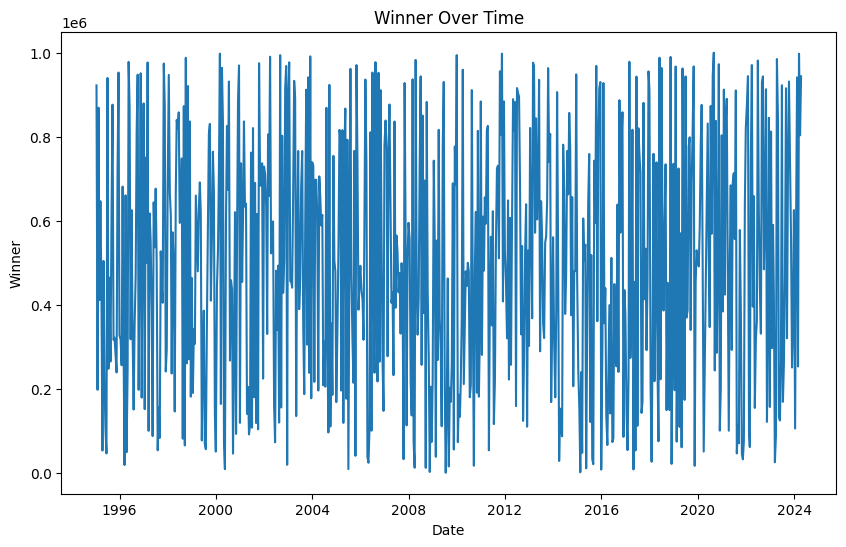

In [33]:
lt['Date'] = pd.to_datetime(lt['Date'])
plt.figure(figsize=(10,6))
plt.plot(lt['Date'], lt['1st'])
plt.title('Winner Over Time')
plt.xlabel('Date')
plt.ylabel('Winner')

plt.show()

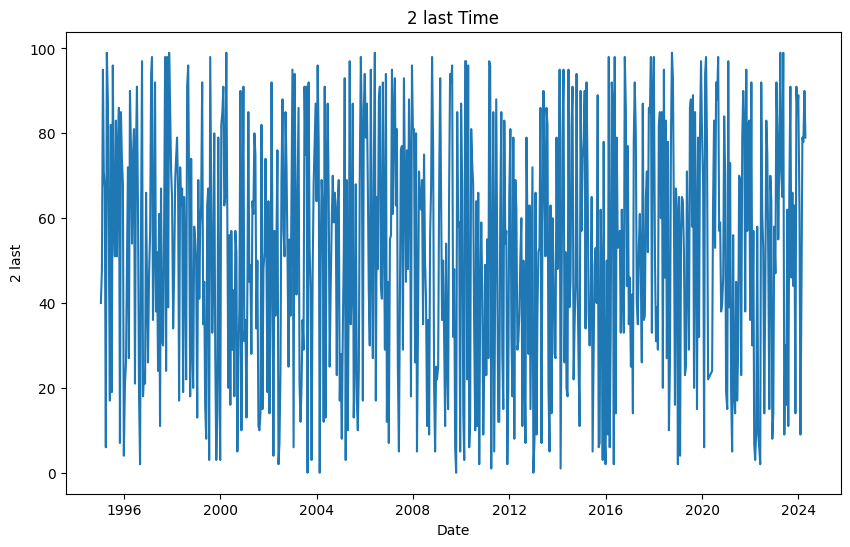

In [34]:
lt['Date'] = pd.to_datetime(lt['Date'])
plt.figure(figsize=(10,6))
plt.plot(lt['Date'], lt['up2'])
plt.title('2 last Time')
plt.xlabel('Date')
plt.ylabel('2 last')

plt.show()

<Axes: ylabel='1st'>

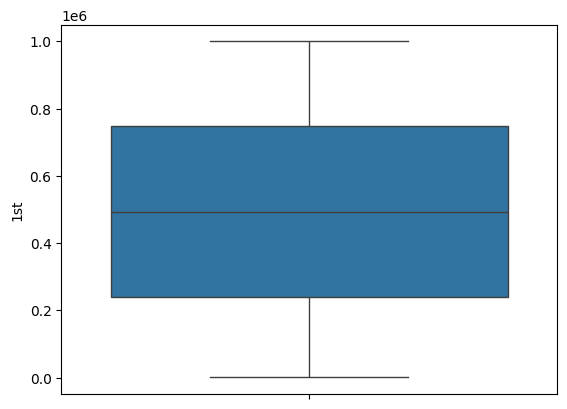

In [37]:
sns.boxplot(data=lt['1st'])

<Axes: ylabel='top3'>

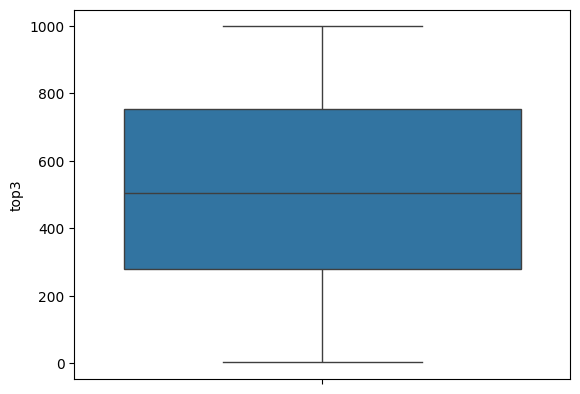

In [38]:
sns.boxplot(data=lt['top3'])

<Axes: ylabel='up2'>

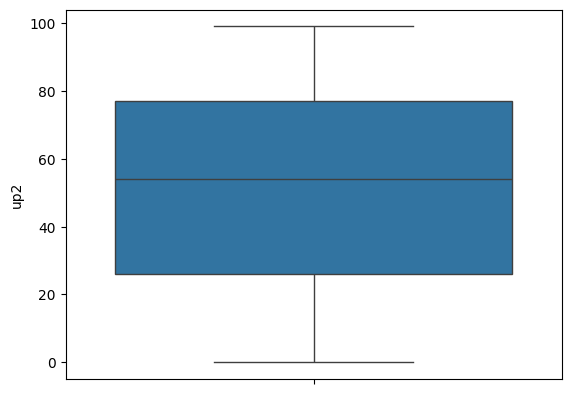

In [39]:
sns.boxplot(data=lt['up2'])